# Data Preprocessing

##### Data Cleaning & Preprocessing
Continue this in 02_preprocessing.ipynb

✅ Already done:
Missing values detection
Outliers detected

➕ Steps to Add:
Missing Value Imputation:
Mean/Median (numerical)
Mode (categorical)
Or SimpleImputer from sklearn.impute

Outlier Handling:
Use IQR, Z-score, or cap extreme values instead of removing
Optionally use Winsorization
Duplicate Removal: df.drop_duplicates()

Encoding Categorical Variables:
LabelEncoding for ordinal
OneHotEncoding for nominal
Use ColumnTransformer for pipeline-friendly encoding

Scaling:
StandardScaler / MinMaxScaler
Apply on numerical columns

Windows

In [3]:
# import pandas as pd

# # Load your dataset
# df = pd.read_csv(r"C:\Users\Arti Rani\.cache\kagglehub\datasets\yasserh\housing-prices-dataset\versions\1\housing.csv")
# print("Dataset loaded successfully.")
# print(df.head())

Linux

In [2]:
import pandas as pd

# Load your dataset
df = pd.read_csv(r"/home/artir/.cache/kagglehub/datasets/yasserh/housing-prices-dataset/versions/1/Housing.csv")
print("Dataset loaded successfully.")
print(df.head())

Dataset loaded successfully.
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


## Outliers 

### Detecting Outliers

In [3]:
# Columns to check for outliers
columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Store outliers
outliers_dict = {}

for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_dict[col] = outliers
    print(f"{col}: {len(outliers)} outliers")
    print(outliers[[col]])  # Display the outliers for each column

price: 15 outliers
       price
0   13300000
1   12250000
2   12250000
3   12215000
4   11410000
5   10850000
6   10150000
7   10150000
8    9870000
9    9800000
10   9800000
11   9681000
12   9310000
13   9240000
14   9240000
area: 12 outliers
      area
7    16200
10   13200
56   11440
64   11175
66   13200
69   12090
125  15600
129  11460
186  11410
191  10700
211  12900
403  12944
bedrooms: 12 outliers
     bedrooms
7           5
28          5
34          5
89          5
112         6
143         5
152         5
271         5
340         5
356         5
395         6
536         5
bathrooms: 1 outliers
   bathrooms
1          4
stories: 41 outliers
     stories
1          4
6          4
9          4
17         4
26         4
30         4
31         4
35         4
37         4
38         4
39         4
41         4
42         4
43         4
44         4
46         4
47         4
50         4
51         4
52         4
53         4
57         4
58         4
59         4
71         4
7

### Outliers plot

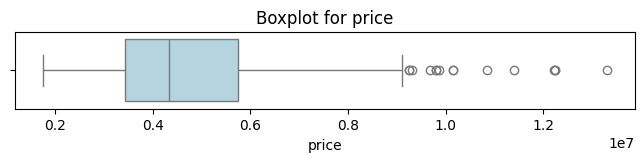

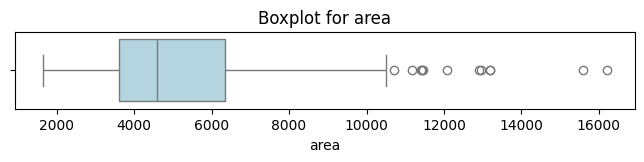

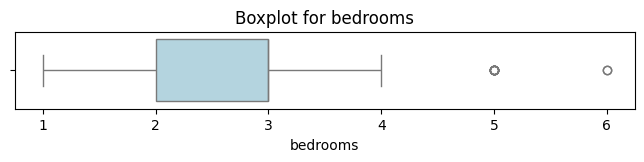

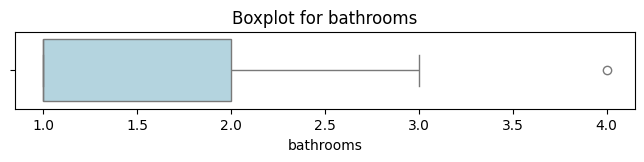

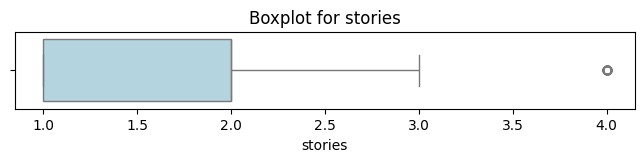

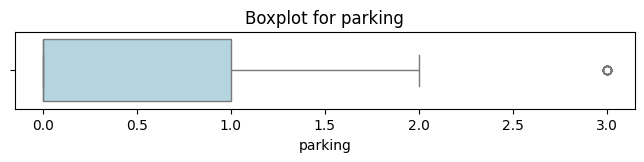

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

for col in columns:
    plt.figure(figsize=(8, 1))
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f"Boxplot for {col}")
    plt.show()

### Handling Outliers (Price, Area)
- Using log-transform & IQR on log-transformed columns

In [5]:
import numpy as np
import pandas as pd

def log_transform_and_cap(df, column):
    # Step 1: Log transform the column (create a new one)
    log_col = f'log_{column}'
    df[log_col] = np.log1p(df[column])

    # Step 2: Compute IQR on log-transformed column
    Q1 = df[log_col].quantile(0.25)
    Q3 = df[log_col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Step 3: Cap outliers on log scale
    df[log_col] = df[log_col].apply(
        lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x
    )

    return df

# Apply for 'price' and 'area'
df = log_transform_and_cap(df, 'price')
df = log_transform_and_cap(df, 'area')

print("First few rows: \n", df.head())  # Display the first few rows to check the transformations
print("Last few rows: \n", df.tail())  # Display the first few rows to check the transformations



First few rows: 
       price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  \
0              no             yes        2      yes        furnished   
1              no             yes        3       no        furnished   
2              no              no        2      yes   semi-furnished   
3              no             yes        3      yes        furnished   
4              no             yes        2       no        furnished   

   log_price  log_area  
0  16.335318  8.912069  
1  16.321037  9.100637  

In [6]:
df['price_recovered'] = np.expm1(df['log_price'])
df['area_recovered'] = np.expm1(df['log_area'])
print(df['price_recovered'].head())  # Display the first few rows to check the transformations
print(df['area_recovered'].head())  # Display the first few rows to check the transformations

0    1.242621e+07
1    1.225000e+07
2    1.225000e+07
3    1.221500e+07
4    1.141000e+07
Name: price_recovered, dtype: float64
0    7420.0
1    8960.0
2    9960.0
3    7500.0
4    7420.0
Name: area_recovered, dtype: float64


##### Updated plot

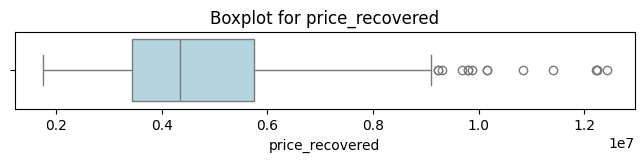

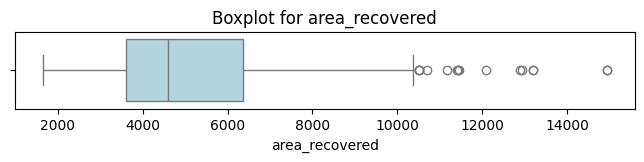

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
columns = ['price_recovered', 'area_recovered']

for col in columns:
    plt.figure(figsize=(8, 1))
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f"Boxplot for {col}")
    plt.show()

##### Rechecking Outliers

In [8]:
# Columns to check for outliers
columns = ['area_recovered', 'price_recovered']

# Store outliers
outliers_dict = {}

for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_dict[col] = outliers
    print(f"{col}: {len(outliers)} outliers")
    print(outliers[[col]])  # Display the outliers for each column

area_recovered: 15 outliers
     area_recovered
7      14933.091465
10     13200.000000
56     11440.000000
64     11175.000000
66     13200.000000
69     12090.000000
82     10500.000000
125    14933.091465
129    11460.000000
142    10500.000000
146    10500.000000
186    11410.000000
191    10700.000000
211    12900.000000
403    12944.000000
price_recovered: 15 outliers
    price_recovered
0      1.242621e+07
1      1.225000e+07
2      1.225000e+07
3      1.221500e+07
4      1.141000e+07
5      1.085000e+07
6      1.015000e+07
7      1.015000e+07
8      9.870000e+06
9      9.800000e+06
10     9.800000e+06
11     9.681000e+06
12     9.310000e+06
13     9.240000e+06
14     9.240000e+06


#### Handling outlier again

- We're again handling outliers of price_recovered & area_recovered column as after performing log transformation, still there exists outliers.

In [9]:
import numpy as np
import pandas as pd

def full_outlier_handling(df, column):
    # Step 1: Log transform
    log_col = f'log_{column}'
    df[log_col] = np.log1p(df[column])

    # Step 2: Cap on log scale
    Q1_log = df[log_col].quantile(0.25)
    Q3_log = df[log_col].quantile(0.75)
    IQR_log = Q3_log - Q1_log
    lower_log = Q1_log - 1.5 * IQR_log
    upper_log = Q3_log + 1.5 * IQR_log

    df[log_col] = df[log_col].clip(lower=lower_log, upper=upper_log)

    # Step 3: Recover original values
    recovered_col = f'{column}_recovered'
    df[recovered_col] = np.expm1(df[log_col])

    # Step 4: Final IQR capping on recovered values (original scale)
    Q1_orig = df[recovered_col].quantile(0.25)
    Q3_orig = df[recovered_col].quantile(0.75)
    IQR_orig = Q3_orig - Q1_orig
    lower_orig = Q1_orig - 1.5 * IQR_orig
    upper_orig = Q3_orig + 1.5 * IQR_orig

    df[recovered_col] = df[recovered_col].clip(lower=lower_orig, upper=upper_orig)

    return df

# Apply for both columns
df = full_outlier_handling(df, 'price')
df = full_outlier_handling(df, 'area')
print(df.head())  # Display the first few rows to check the transformations 

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  \
0              no             yes        2      yes        furnished   
1              no             yes        3       no        furnished   
2              no              no        2      yes   semi-furnished   
3              no             yes        3      yes        furnished   
4              no             yes        2       no        furnished   

   log_price  log_area  price_recovered  area_recovered  
0  16.335318  8.912069        9205

##### Again check outliers

In [10]:
# Columns to check for outliers
columns = ['price_recovered', 'area_recovered']

# Store outliers
outliers_dict = {}

for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_dict[col] = outliers
    print(f"{col}: {len(outliers)} outliers")
    print(outliers[[col]])  # Display the outliers for each column

price_recovered: 0 outliers
Empty DataFrame
Columns: [price_recovered]
Index: []
area_recovered: 0 outliers
Empty DataFrame
Columns: [area_recovered]
Index: []


Boxplot

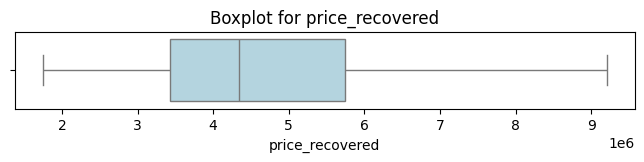

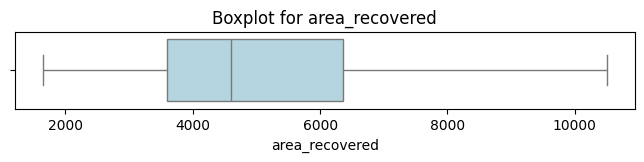

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
columns = ['price_recovered', 'area_recovered']

for col in columns:
    plt.figure(figsize=(8, 1))
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f"Boxplot for {col}")
    plt.show()

In [12]:
print(df.head())  # Display the first few rows to check the transformations

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  \
0              no             yes        2      yes        furnished   
1              no             yes        3       no        furnished   
2              no              no        2      yes   semi-furnished   
3              no             yes        3      yes        furnished   
4              no             yes        2       no        furnished   

   log_price  log_area  price_recovered  area_recovered  
0  16.335318  8.912069        9205

##### Distribution of recovered columns

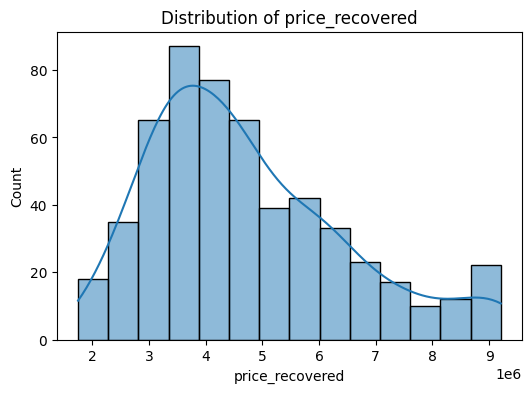

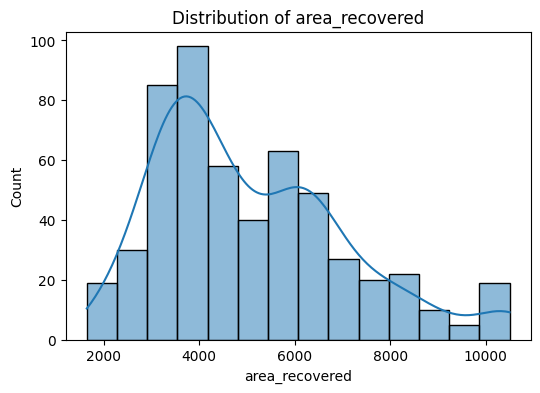

In [13]:
# plot the visual method(quick insight) for the recovered columns
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['price_recovered', 'area_recovered']

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

#### Dropping Unnecessary columns

Since outlier handling is done and I've validated that price_recovered and area_recovered have no outliers:
1. Replace the original price and area columns with their cleaned versions.
2. Drop the temporary columns used in the transformation process (log_price, log_area, price_recovered, area_recovered).

In [14]:
# Step 1: Replace original columns with recovered versions
df['price'] = df['price_recovered']
df['area'] = df['area_recovered']
print(df.head()) 

       price    area  bedrooms  bathrooms  stories mainroad guestroom  \
0  9205000.0  7420.0         4          2        3      yes        no   
1  9205000.0  8960.0         4          4        4      yes        no   
2  9205000.0  9960.0         3          2        2      yes        no   
3  9205000.0  7500.0         4          2        2      yes        no   
4  9205000.0  7420.0         4          1        2      yes       yes   

  basement hotwaterheating airconditioning  parking prefarea furnishingstatus  \
0       no              no             yes        2      yes        furnished   
1       no              no             yes        3       no        furnished   
2      yes              no              no        2      yes   semi-furnished   
3      yes              no             yes        3      yes        furnished   
4      yes              no             yes        2       no        furnished   

   log_price  log_area  price_recovered  area_recovered  
0  16.335318  8.

In [15]:
# Step 2: Drop unnecessary columns used for outlier handling
df.drop(['log_price', 'log_area', 'price_recovered', 'area_recovered'], axis=1, inplace=True)

# Optional: Check result
print(df.head())
print("\n\n Remaining columns:", df.columns.tolist())

       price    area  bedrooms  bathrooms  stories mainroad guestroom  \
0  9205000.0  7420.0         4          2        3      yes        no   
1  9205000.0  8960.0         4          4        4      yes        no   
2  9205000.0  9960.0         3          2        2      yes        no   
3  9205000.0  7500.0         4          2        2      yes        no   
4  9205000.0  7420.0         4          1        2      yes       yes   

  basement hotwaterheating airconditioning  parking prefarea furnishingstatus  
0       no              no             yes        2      yes        furnished  
1       no              no             yes        3       no        furnished  
2      yes              no              no        2      yes   semi-furnished  
3      yes              no             yes        3      yes        furnished  
4      yes              no             yes        2       no        furnished  


 Remaining columns: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'main

## Insights extraction

### ✅ 1. Correlation Heatmap for Numerical Features
	Identifies multicollinearity between features (remove one of highly correlated ones)
How it helps:
- Highly correlated features (e.g., bedrooms & bathrooms) may carry redundant info.
- Consider dimensionality reduction or dropping some.

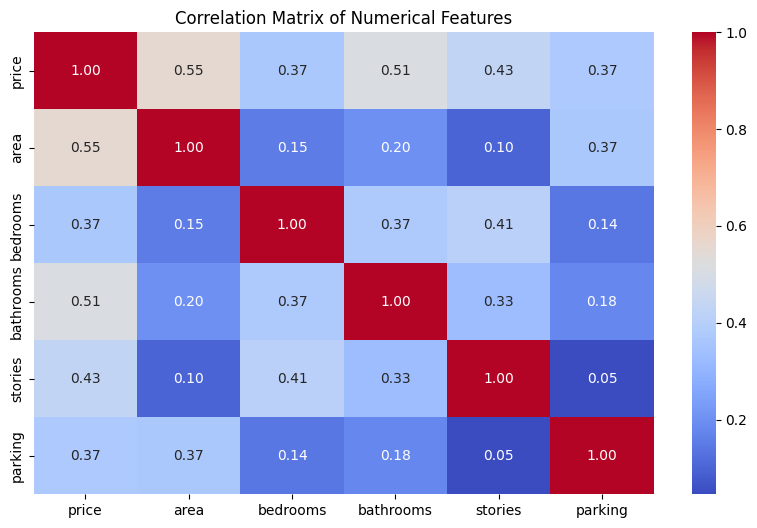

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Numerical Features")
plt.show()

### ✅ 2. Distribution Plot of Target Variable (price)
- If price is skewed, linear models will perform worse — consider log-transforming.
- Detects skew in price, which affects many ML models (consider transformation)

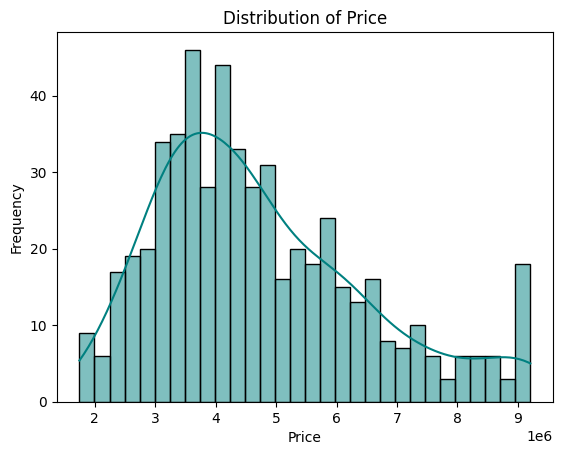

In [17]:
sns.histplot(df['price'], kde=True, color='teal', bins=30)
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

🔁 Optional: Add log1p(price) version to see improvement:

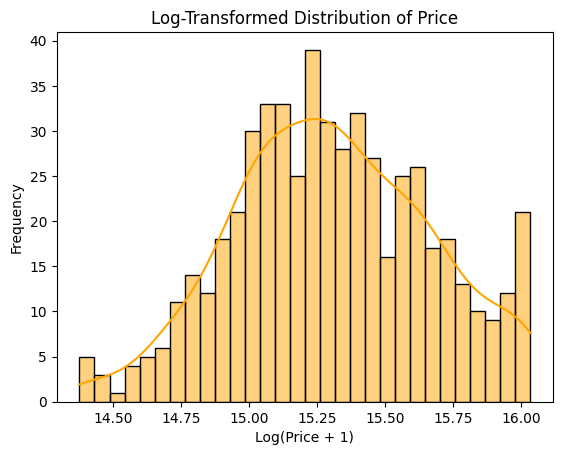

In [18]:
import numpy as np

sns.histplot(np.log1p(df['price']), kde=True, color='orange', bins=30)
plt.title("Log-Transformed Distribution of Price")
plt.xlabel("Log(Price + 1)")
plt.ylabel("Frequency")
plt.show()

### ✅ 3. Relationship Plots (Pairwise Plots)
We'll check price against:
- area
- bedrooms
- bathrooms
- storis
- parking

How it helps:
- Visual clues of strong (or weak) relationships with price → guide feature importance
- Detect non-linear relationships (good for tree models)

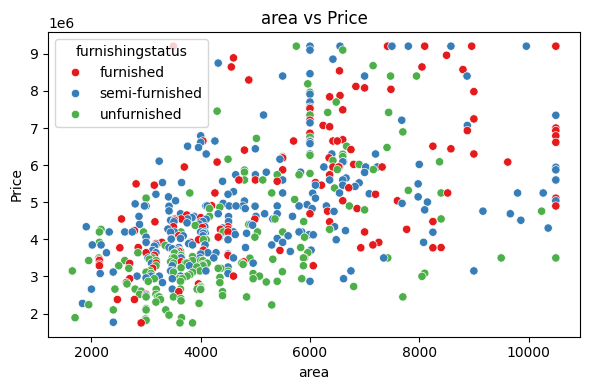

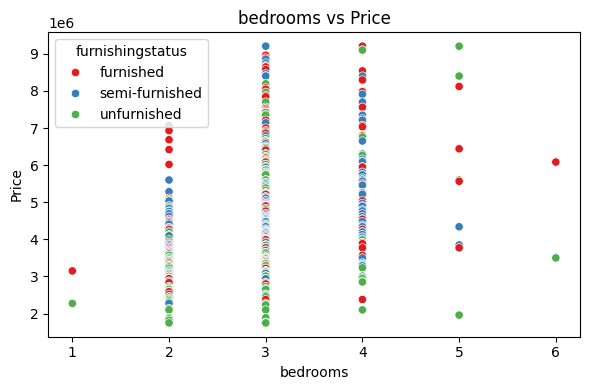

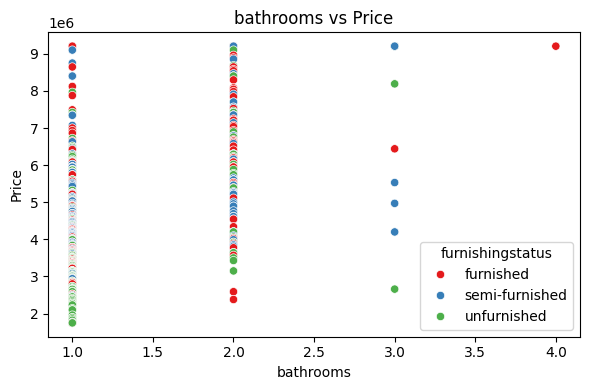

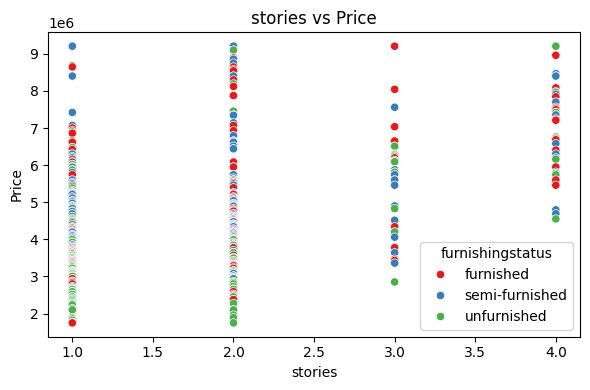

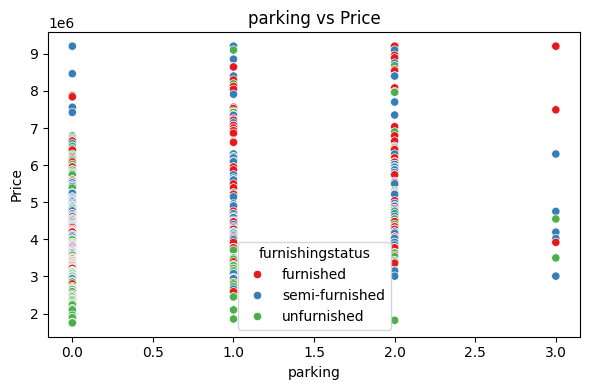

In [19]:
important_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
for col in important_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=col, y='price', hue='furnishingstatus', palette="Set1")
    plt.title(f"{col} vs Price")
    plt.xlabel(col)
    plt.ylabel("Price")
    plt.tight_layout()
    plt.show()

### ✅ 4. Boxplots for Categorical → Price
How it helps:
- Shows which categories (e.g., airconditioning = yes) drive prices up/down
- Good candidates for one-hot encoding
See how categories affect price:

Plot price vs Categorical Columns (Boxplots)
🧠 Why Boxplots?
- Boxplots show median price, IQR, and presence of outliers per category.
- You’ll visually compare how each category influences price — e.g., does having airconditioning lead to higher price?

/tmp/ipykernel_203296/3528906552.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='price', palette="Set2")


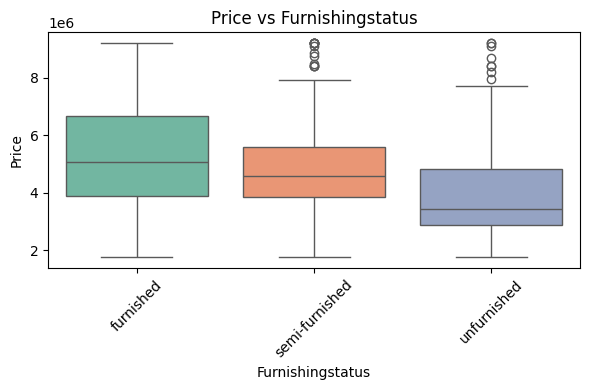

/tmp/ipykernel_203296/3528906552.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='price', palette="Set2")


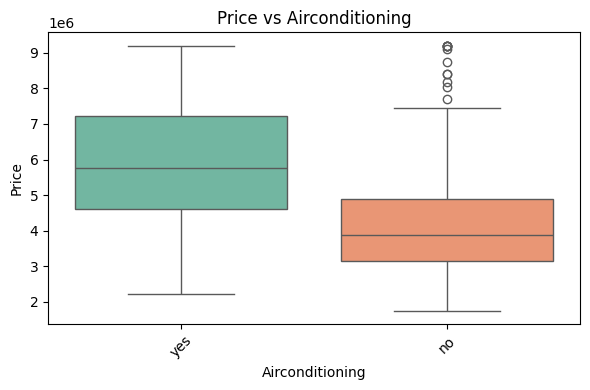

/tmp/ipykernel_203296/3528906552.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='price', palette="Set2")


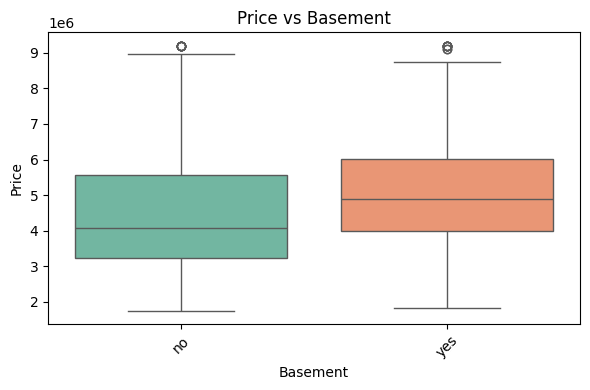

/tmp/ipykernel_203296/3528906552.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='price', palette="Set2")


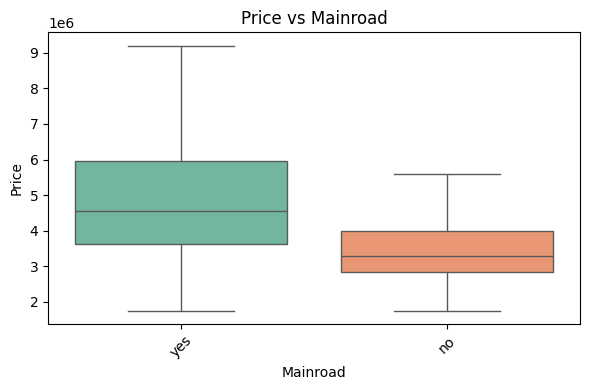

/tmp/ipykernel_203296/3528906552.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='price', palette="Set2")


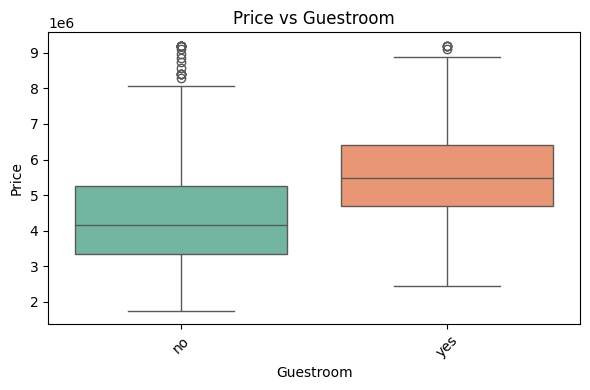

/tmp/ipykernel_203296/3528906552.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='price', palette="Set2")


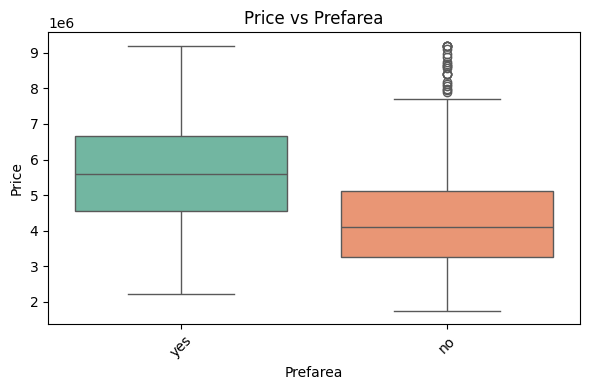

In [20]:
categorical_cols = ['furnishingstatus', 'airconditioning', 'basement', 'mainroad', 'guestroom', 'prefarea']

import seaborn as sns
import matplotlib.pyplot as plt

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=col, y='price', palette="Set2")
    plt.title(f"Price vs {col.capitalize()}")
    plt.xticks(rotation=45)
    plt.xlabel(col.capitalize())
    plt.ylabel("Price")
    plt.tight_layout()
    plt.show()


## Categorical Encoding
Machine learning models can’t handle categorical data like "yes"/"no" or "furnished" directly — they need numerical values.

### 🚧 Step 1: Identify Column Types

We’ll split columns into:
Nominal (no order) → One-Hot Encoding
Binary → Label Encoding (or One-Hot)
Ordinal → Ordinal Encoding (if applicable, not needed here)

| Column            | Type     | Encoding Type        |
|-------------------|----------|---------------------|
| mainroad          | Binary   | One-Hot / Label     |
| guestroom         | Binary   | One-Hot / Label     |
| basement          | Binary   | One-Hot / Label     |
| hotwaterheating   | Binary   | One-Hot / Label     |
| airconditioning   | Binary   | One-Hot / Label     |
| prefarea          | Binary   | One-Hot / Label     |
| furnishingstatus  | Nominal  | One-Hot             |

✅ Encoding Strategy
We'll use ColumnTransformer and Pipeline to apply:
OneHotEncoder to all binary + nominal columns
No encoding for numerical columns

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Categorical columns to encode
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                    'airconditioning', 'prefarea', 'furnishingstatus']

# Numerical columns (already cleaned & transformed earlier)
numerical_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Target column
target = 'price'

# Define column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numerical_cols),
        
        ('cat', OneHotEncoder(drop=None, sparse_output=False), categorical_cols)
    ]
)


In [29]:
print(df['furnishingstatus'].unique())  # Display unique values in furnishingstatus column

['furnished' 'semi-furnished' 'unfurnished']


In [22]:
# Fit and transform sample
encoded = preprocessor.fit_transform(df)

# Get feature names
ohe = preprocessor.named_transformers_['cat']
feature_names = numerical_cols + list(ohe.get_feature_names_out(categorical_cols))

print("Final feature names:", feature_names)


Final feature names: ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad_no', 'mainroad_yes', 'guestroom_no', 'guestroom_yes', 'basement_no', 'basement_yes', 'hotwaterheating_no', 'hotwaterheating_yes', 'airconditioning_no', 'airconditioning_yes', 'prefarea_no', 'prefarea_yes', 'furnishingstatus_furnished', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']


Distribution of Furnishing Status

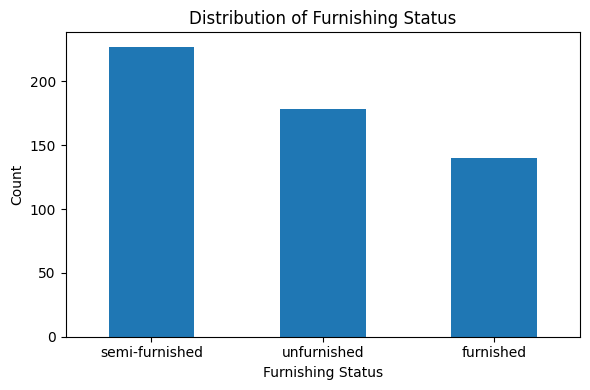

In [23]:
import matplotlib.pyplot as plt

# Plot value counts of furnishing status
plt.figure(figsize=(6, 4))
df['furnishingstatus'].value_counts().plot(kind='bar')
plt.title('Distribution of Furnishing Status')
plt.xlabel('Furnishing Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Feature Engineering

Before model building, it’s critical to do some final feature selection & engineering checks, especially for:
✅ Why These Next Steps Matter:
| Step                                                   | Purpose                                                  |
| ------------------------------------------------------ | -------------------------------------------------------- |
| **1. Select Features with High Correlation to Target** | Keep only features that truly influence `price` (target) |
| **2. Check for Multicollinearity**                     | Avoid giving the model redundant or conflicting signals  |
| **3. Feature Engineering Ideas**                       | Add new features to boost model performance              |


### 🔹 Step 1: Select Features Highly Correlated to Target (price)
Use Pearson correlation for numerical features:

In [24]:
# Get correlations
corr_matrix = df.corr(numeric_only=True)

# Sort by absolute correlation with 'price'
target_corr = corr_matrix['price'].abs().sort_values(ascending=False)
print(target_corr)

# Filter features with strong correlation (e.g., > 0.3)
strong_features = target_corr[target_corr > 0.3].index.tolist()
print("Selected strong features:", strong_features)

price        1.000000
area         0.553876
bathrooms    0.508686
stories      0.431724
parking      0.373578
bedrooms     0.368216
Name: price, dtype: float64
Selected strong features: ['price', 'area', 'bathrooms', 'stories', 'parking', 'bedrooms']


### ✅ Step 1B: Identify Strong Categorical Features Affecting price

#### 🔹 1. Compare Mean Price per Category
- This shows how much the average price varies across categories.
- If different categories in a feature show large gaps in average price, it likely has strong predictive power

In [25]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    print(f"\n{col} vs Price:")
    print(df.groupby(col)['price'].mean().sort_values(ascending=False))


mainroad vs Price:
mainroad
yes    4.945963e+06
no     3.398905e+06
Name: price, dtype: float64

guestroom vs Price:
guestroom
yes    5.752268e+06
no     4.505483e+06
Name: price, dtype: float64

basement vs Price:
basement
yes    5.181668e+06
no     4.482282e+06
Name: price, dtype: float64

hotwaterheating vs Price:
hotwaterheating
yes    5.539520e+06
no     4.688343e+06
Name: price, dtype: float64

airconditioning vs Price:
airconditioning
yes    5.914936e+06
no     4.179779e+06
Name: price, dtype: float64

prefarea vs Price:
prefarea
yes    5.763929e+06
no     4.409217e+06
Name: price, dtype: float64

furnishingstatus vs Price:
furnishingstatus
furnished         5.398196e+06
semi-furnished    4.879987e+06
unfurnished       4.005180e+06
Name: price, dtype: float64


#### 🔹 2. Boxplots (Visual Check for Influence)
👉 Boxplots reveal:

- Median prices per category
- Spread of price (variance)
- Outliers and skewness

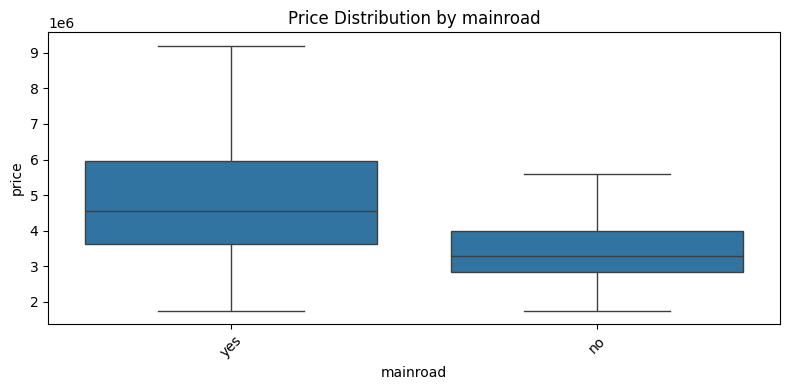

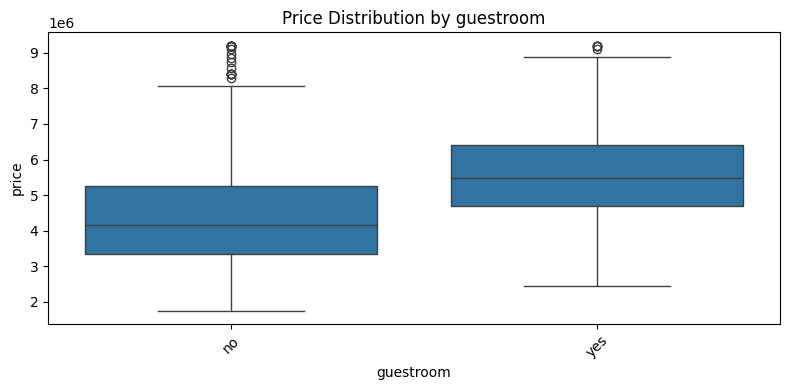

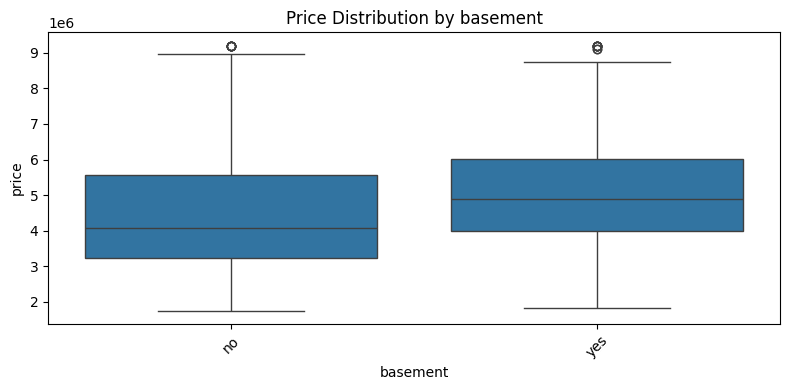

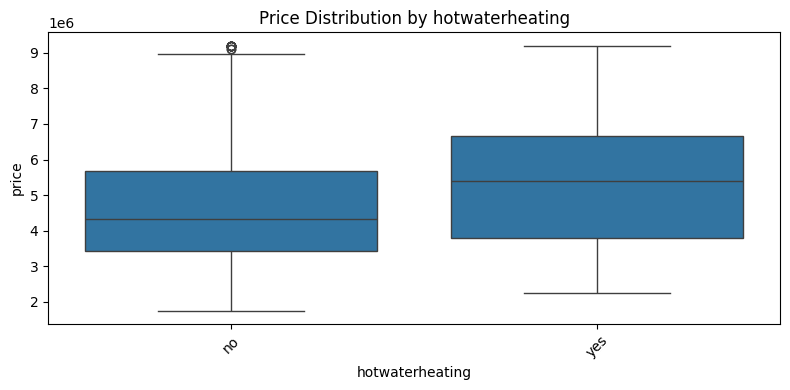

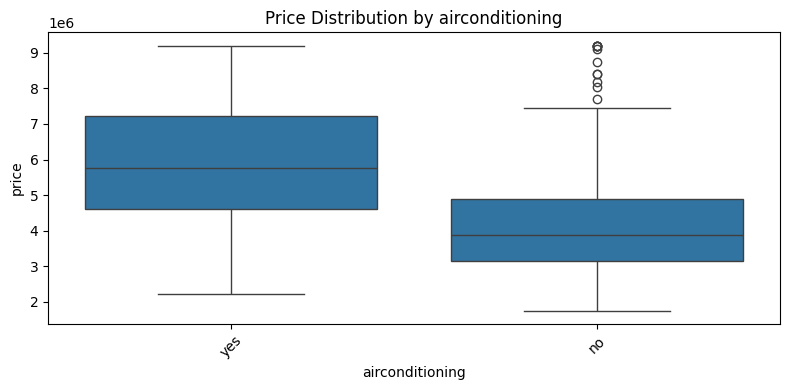

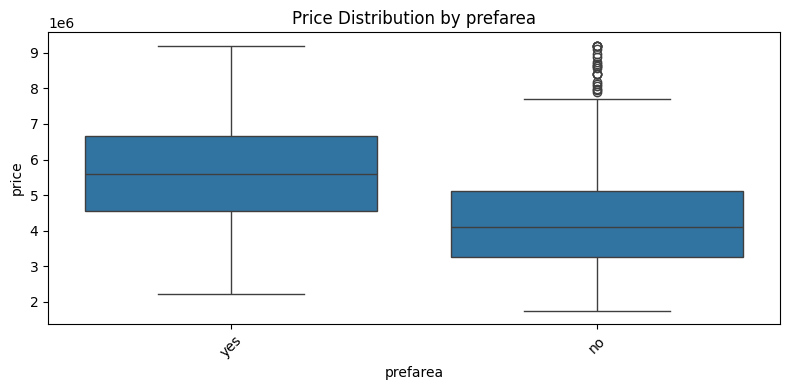

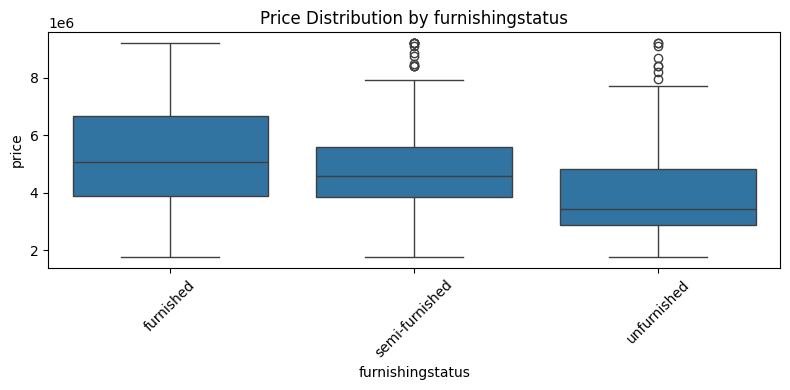

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=col, y='price', data=df)
    plt.title(f'Price Distribution by {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


#### 🔹 3. ANOVA (Statistical Test)
📌 Interpretation:
- p < 0.05 → Feature has statistically significant effect on price

In [27]:
from scipy.stats import f_oneway

for col in categorical_cols:
    groups = [group['price'].values for name, group in df.groupby(col)]
    if len(groups) > 1:
        stat, p = f_oneway(*groups)
        print(f"{col}: ANOVA p-value = {p:.4f}")
if p < 0.05:
            print(f"{col} has a statistically significant effect on price (p < 0.05)")  

mainroad: ANOVA p-value = 0.0000
guestroom: ANOVA p-value = 0.0000
basement: ANOVA p-value = 0.0000
hotwaterheating: ANOVA p-value = 0.0171
airconditioning: ANOVA p-value = 0.0000
prefarea: ANOVA p-value = 0.0000
furnishingstatus: ANOVA p-value = 0.0000
furnishingstatus has a statistically significant effect on price (p < 0.05)


### 🔹 Step 2: Check for Multicollinearity (Using VIF)
| VIF Interpretation                                                   |
| -------------------------------------------------------------------- |
| **VIF > 10** = Strong multicollinearity, remove one of the variables |
| **VIF 5–10** = Moderate, investigate                                 |
| **VIF < 5** = Good                                                   |


In [28]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Subset only numerical columns (you can also check encoded features later)
X = df[numerical_cols]
X = add_constant(X)  # add constant for VIF calculation

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


     Feature        VIF
0      const  22.096036
1       area   1.188645
2   bedrooms   1.315082
3  bathrooms   1.253357
4    stories   1.255929
5    parking   1.179647


### OHE on Categorical columns

In [29]:
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                    'airconditioning', 'prefarea', 'furnishingstatus']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=False)
print("Encoded DataFrame:\n", df_encoded.head())

Encoded DataFrame:
        price    area  bedrooms  bathrooms  stories  parking  mainroad_no  \
0  9205000.0  7420.0         4          2        3        2        False   
1  9205000.0  8960.0         4          4        4        3        False   
2  9205000.0  9960.0         3          2        2        2        False   
3  9205000.0  7500.0         4          2        2        3        False   
4  9205000.0  7420.0         4          1        2        2        False   

   mainroad_yes  guestroom_no  guestroom_yes  ...  basement_yes  \
0          True          True          False  ...         False   
1          True          True          False  ...         False   
2          True          True          False  ...          True   
3          True          True          False  ...          True   
4          True         False           True  ...          True   

   hotwaterheating_no  hotwaterheating_yes  airconditioning_no  \
0                True                False            

### Feature Selection

#### ✅ 1. Feature Selection Based on Correlation with Target
We check which features are most correlated with the target price.

In [30]:
# Check correlation with price
correlation = df_encoded.corr()['price'].sort_values(ascending=False)
print(correlation)

price                              1.000000
area                               0.553876
bathrooms                          0.508686
airconditioning_yes                0.462496
stories                            0.431724
parking                            0.373578
bedrooms                           0.368216
prefarea_yes                       0.329359
mainroad_yes                       0.309048
guestroom_yes                      0.273506
furnishingstatus_furnished         0.226194
basement_yes                       0.191375
hotwaterheating_yes                0.102127
furnishingstatus_semi-furnished    0.073943
hotwaterheating_no                -0.102127
basement_no                       -0.191375
guestroom_no                      -0.273506
furnishingstatus_unfurnished      -0.288460
mainroad_no                       -0.309048
prefarea_no                       -0.329359
airconditioning_no                -0.462496
Name: price, dtype: float64


- Selecting Features based on correlation

In [31]:
selected_corr_features = correlation[abs(correlation) > 0.1].index.tolist()
print("Selected features based on correlation:", selected_corr_features)

Selected features based on correlation: ['price', 'area', 'bathrooms', 'airconditioning_yes', 'stories', 'parking', 'bedrooms', 'prefarea_yes', 'mainroad_yes', 'guestroom_yes', 'furnishingstatus_furnished', 'basement_yes', 'hotwaterheating_yes', 'hotwaterheating_no', 'basement_no', 'guestroom_no', 'furnishingstatus_unfurnished', 'mainroad_no', 'prefarea_no', 'airconditioning_no']


#### ✅ 2. Multicollinearity Check using VIF
📌 VIF = how much a feature is linearly dependent on other features.
Higher VIF (>5 or >10) = potential multicollinearity problem.
💡 Drop features with VIF > 10 iteratively if multicollinearity is suspected.

In [32]:
# Step 1: Select only numerical columns from df_encoded
numerical_corr_features = [
    col for col in selected_corr_features 
    if pd.api.types.is_numeric_dtype(df_encoded[col])
]

# Step 2: Subset the data
X_vif = df_encoded[numerical_corr_features].copy()

# Dropping target column

# X_vif = df_encoded[numerical_corr_features].drop(columns=['price'])  # assuming 'price' is the target column

# Convert boolean columns to int (0/1) for VIF calculation
for col in X_vif.select_dtypes(include='bool').columns:
    X_vif[col] = X_vif[col].astype(int)


# Step 3: Drop rows with NaNs (if any) to avoid VIF errors
X_vif = X_vif.dropna()

# Step 4: Add constant (intercept)
from statsmodels.tools.tools import add_constant
X_vif = add_constant(X_vif)

# Step 5: Calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

vif = pd.DataFrame()
vif['Feature'] = X_vif.columns
vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Show results
print(vif.sort_values(by="VIF", ascending=False))



                         Feature       VIF
4            airconditioning_yes       inf
9                   mainroad_yes       inf
10                 guestroom_yes       inf
12                  basement_yes       inf
8                   prefarea_yes       inf
18                   mainroad_no       inf
19                   prefarea_no       inf
20            airconditioning_no       inf
13           hotwaterheating_yes       inf
16                  guestroom_no       inf
15                   basement_no       inf
14            hotwaterheating_no       inf
1                          price  3.257697
2                           area  1.645598
5                        stories  1.627824
3                      bathrooms  1.488662
7                       bedrooms  1.375246
17  furnishingstatus_unfurnished  1.285765
6                        parking  1.263446
11    furnishingstatus_furnished  1.239180
0                          const  0.000000


/media/artir/Data1/coding/projects/Final/GitHub/AI-ML_Projects/venv/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/media/artir/Data1/coding/projects/Final/GitHub/AI-ML_Projects/venv/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [36]:
# drop all columns of df_encoded
# df_encoded = df_encoded.drop(columns=df_encoded.columns)

# drop entire dataframe df_encoded
# df_encoded = None  # This will free up memory by removing the DataFrame reference
# print("df_encoded has been dropped and set to None.")
# print(df_encoded)




#### ✅ 3. Model-Based Feature Importance (Tree Model)
Keep the top N features or those above a certain importance threshold (> 0.01 is typical).
Use a Random Forest or ExtraTreesRegressor:

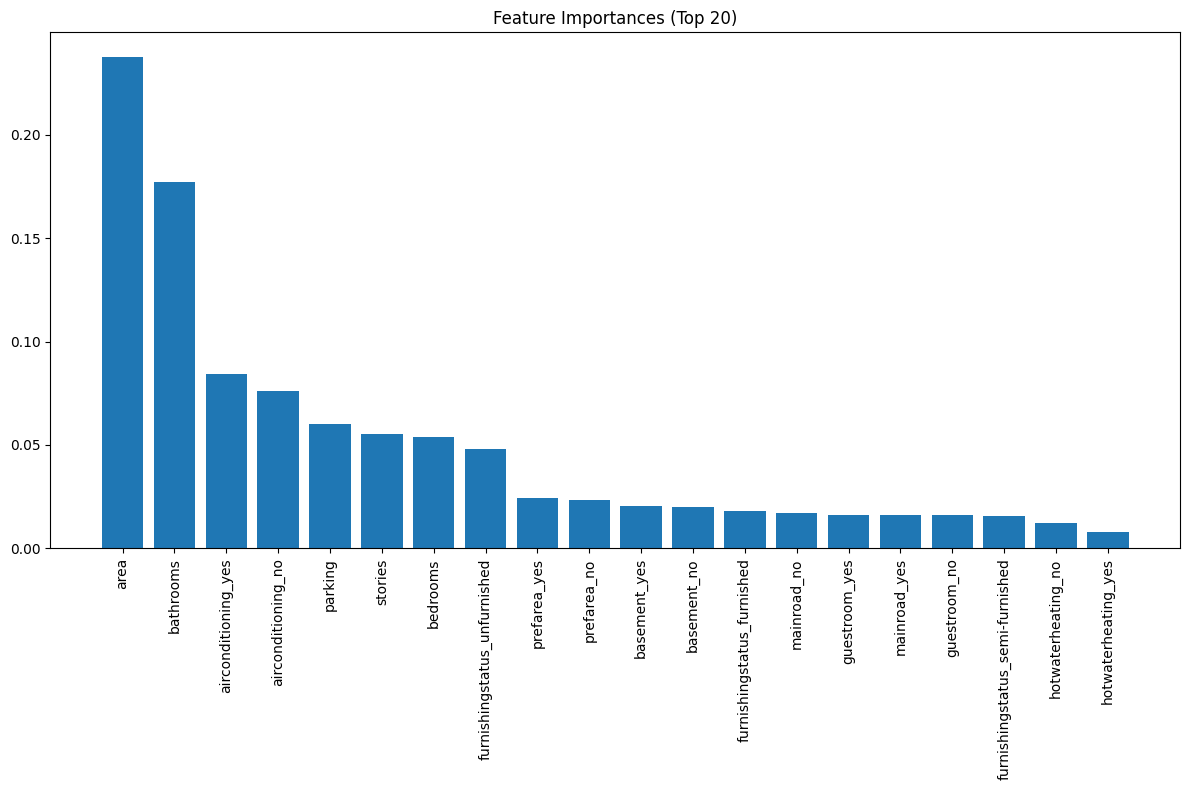

In [33]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
import numpy as np

X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Fit model
model = ExtraTreesRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Plot feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Top N features
top_n = 20
plt.figure(figsize=(12, 8))
plt.title("Feature Importances (Top 20)")
plt.bar(range(top_n), importances[indices][:top_n], align="center")
plt.xticks(range(top_n), X.columns[indices][:top_n], rotation=90)
plt.tight_layout()
plt.show()


✅ Option B: Keep features above threshold (e.g., > 0.01)

In [34]:
# Keep features with importance > threshold
threshold = 0.01
important_indices = np.where(importances > threshold)[0]
important_features = X.columns[important_indices]

X_selected = X[important_features]  # Final selected features
print(f"Features with importance > {threshold}:\n", important_features.tolist())

Features with importance > 0.01:
 ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad_no', 'mainroad_yes', 'guestroom_no', 'guestroom_yes', 'basement_no', 'basement_yes', 'hotwaterheating_no', 'airconditioning_no', 'airconditioning_yes', 'prefarea_no', 'prefarea_yes', 'furnishingstatus_furnished', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']


Dropping Columns  

In [35]:
columns_to_drop = [
    'mainroad_no',
    'guestroom_no',
    'basement_no',
    'airconditioning_no',
    'prefarea_no',
    'airconditioning_no',  # already included, just make sure it's dropped
    'furnishingstatus_semi-furnished'  # or any one from the 3
]

print("original df:\n")
print(df.head(10))  # Display the first few rows to check the transformations

print("Columns before dropping:", df_encoded.columns.tolist())
print("encoded df after ohe:\n")
print(df_encoded.head(10))  # Display the first few rows to check the transformations

df_encoded.drop(columns=columns_to_drop, axis=1, inplace=True)
print("Remaining columns after dropping:", df_encoded.columns.tolist())
# Print each column name with its first 5 values
for col in df_encoded.columns:
    print(f"{col}: {df_encoded[col].head(20).tolist()}")


original df:

       price     area  bedrooms  bathrooms  stories mainroad guestroom  \
0  9205000.0   7420.0         4          2        3      yes        no   
1  9205000.0   8960.0         4          4        4      yes        no   
2  9205000.0   9960.0         3          2        2      yes        no   
3  9205000.0   7500.0         4          2        2      yes        no   
4  9205000.0   7420.0         4          1        2      yes       yes   
5  9205000.0   7500.0         3          3        1      yes        no   
6  9205000.0   8580.0         4          3        4      yes        no   
7  9205000.0  10500.0         5          3        2      yes        no   
8  9205000.0   8100.0         4          1        2      yes       yes   
9  9205000.0   5750.0         3          2        4      yes       yes   

  basement hotwaterheating airconditioning  parking prefarea furnishingstatus  
0       no              no             yes        2      yes        furnished  
1       no 

In [36]:
print(df_encoded.head(10))  # Display the first few rows to check the transformations

       price     area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
0  9205000.0   7420.0         4          2        3        2          True   
1  9205000.0   8960.0         4          4        4        3          True   
2  9205000.0   9960.0         3          2        2        2          True   
3  9205000.0   7500.0         4          2        2        3          True   
4  9205000.0   7420.0         4          1        2        2          True   
5  9205000.0   7500.0         3          3        1        2          True   
6  9205000.0   8580.0         4          3        4        2          True   
7  9205000.0  10500.0         5          3        2        0          True   
8  9205000.0   8100.0         4          1        2        2          True   
9  9205000.0   5750.0         3          2        4        1          True   

   guestroom_yes  basement_yes  hotwaterheating_no  hotwaterheating_yes  \
0          False         False                True                

### Calculate VIF After Dropping Columns

🧠 Conceptual Reminder: Why We Check VIF
VIF (Variance Inflation Factor) detects multicollinearity, i.e., when one feature is linearly predictable from others.

Multicollinearity inflates variance of coefficients in linear models → leads to unstable or unreliable predictions.

#### ✅ Step 1: Separate Features from Target
Why?

VIF should only be calculated on independent variables (features), not the target (price).

In [37]:
X = df_encoded.drop(columns=['price'])  # assuming 'price' is the target column

#### ✅ Step 2: Add Constant Term for Intercept
Why?

Many statistical models, including VIF, assume a constant term in the equation. This step adds an intercept column.

In [39]:
from statsmodels.tools.tools import add_constant

X_with_const = add_constant(X)


#### ✅ Step 3: Calculate VIF for Each Feature
Why?

This loop calculates the VIF score for every feature (including constant).

Features with VIF > 10 are considered to have high multicollinearity (though threshold can vary).

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Convert boolean columns to int for VIF calculation
X_vif_numeric = X_with_const.copy()
for col in X_vif_numeric.select_dtypes(include='bool').columns:
	X_vif_numeric[col] = X_vif_numeric[col].astype(int)

vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif_numeric.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif_numeric.values, i) for i in range(X_vif_numeric.shape[1])]

print(vif_data)

                         Feature       VIF
0                          const  0.000000
1                           area  1.372283
2                       bedrooms  1.367103
3                      bathrooms  1.286658
4                        stories  1.475251
5                        parking  1.225757
6                   mainroad_yes  1.176622
7                  guestroom_yes  1.217784
8                   basement_yes  1.323125
9             hotwaterheating_no       inf
10           hotwaterheating_yes       inf
11           airconditioning_yes  1.215573
12                  prefarea_yes  1.154312
13    furnishingstatus_furnished  1.239144
14  furnishingstatus_unfurnished  1.253616


/media/artir/Data1/coding/projects/Final/GitHub/AI-ML_Projects/venv/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/media/artir/Data1/coding/projects/Final/GitHub/AI-ML_Projects/venv/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


#### ✅ Step 4: Drop High VIF Columns 
Drop columns one-by-one with highest VIF (except const), then re-run VIF calculation.

Do this until no feature has VIF > 10 (or a threshold you choose).

In [41]:
# Example: drop one column
X_reduced = X_with_const.drop(columns=['hotwaterheating_no'])  # if this had high VIF
# Then re-run VIF calculation
print(X_reduced.head(10))  # Display the first few rows to check the transformations


   const     area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
0    1.0   7420.0         4          2        3        2          True   
1    1.0   8960.0         4          4        4        3          True   
2    1.0   9960.0         3          2        2        2          True   
3    1.0   7500.0         4          2        2        3          True   
4    1.0   7420.0         4          1        2        2          True   
5    1.0   7500.0         3          3        1        2          True   
6    1.0   8580.0         4          3        4        2          True   
7    1.0  10500.0         5          3        2        0          True   
8    1.0   8100.0         4          1        2        2          True   
9    1.0   5750.0         3          2        4        1          True   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0          False         False                False                 True   
1          False         False   

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Convert boolean columns to int for VIF calculation
X_vif_numeric = X_reduced.copy()
for col in X_vif_numeric.select_dtypes(include='bool').columns:
	X_vif_numeric[col] = X_vif_numeric[col].astype(int)

vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif_numeric.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif_numeric.values, i) for i in range(X_vif_numeric.shape[1])]

print(vif_data)

                         Feature        VIF
0                          const  30.401076
1                           area   1.372283
2                       bedrooms   1.367103
3                      bathrooms   1.286658
4                        stories   1.475251
5                        parking   1.225757
6                   mainroad_yes   1.176622
7                  guestroom_yes   1.217784
8                   basement_yes   1.323125
9            hotwaterheating_yes   1.041705
10           airconditioning_yes   1.215573
11                  prefarea_yes   1.154312
12    furnishingstatus_furnished   1.239144
13  furnishingstatus_unfurnished   1.253616


#### Shifting The Values From X_reduced to df_encoded

In [43]:
# Add 'price' column from df_encoded into X_reduced
X_reduced_with_price = X_reduced.copy()
X_reduced_with_price['price'] = df_encoded['price'].values

# Optional: Check the result
print(X_reduced_with_price.head())

   const    area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
0    1.0  7420.0         4          2        3        2          True   
1    1.0  8960.0         4          4        4        3          True   
2    1.0  9960.0         3          2        2        2          True   
3    1.0  7500.0         4          2        2        3          True   
4    1.0  7420.0         4          1        2        2          True   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0          False         False                False                 True   
1          False         False                False                 True   
2          False          True                False                False   
3          False          True                False                 True   
4           True          True                False                 True   

   prefarea_yes  furnishingstatus_furnished  furnishingstatus_unfurnished  \
0          True            

In [44]:
# Replace df_encoded's columns with the new reduced set
df_encoded_with_price = X_reduced_with_price.copy()

# Optional: check
print("df_encoded with price: \n", df_encoded_with_price.head())

# Copying df_encoded_with_price to df_encoded for scaling
df_encoded = df_encoded_with_price.copy()
print("df_encoded for scaling: \n", df_encoded.head())  # Display the first few rows of the encoded DataFrame

df_encoded with price: 
    const    area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
0    1.0  7420.0         4          2        3        2          True   
1    1.0  8960.0         4          4        4        3          True   
2    1.0  9960.0         3          2        2        2          True   
3    1.0  7500.0         4          2        2        3          True   
4    1.0  7420.0         4          1        2        2          True   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0          False         False                False                 True   
1          False         False                False                 True   
2          False          True                False                False   
3          False          True                False                 True   
4           True          True                False                 True   

   prefarea_yes  furnishingstatus_furnished  furnishingstatus_unfurnished  \
0 

### Scaling/Normalizing Data

#### 1) Decide which columns to scale
We want to scale continuous numeric features (area, bedrooms, bathrooms, stories, parking, etc.). We should not scale encoded dummy/binary columns (0/1) — they can be left as-is (scaling them is safe but unnecessary). 
Why: binary columns are already comparable (0/1) and represent categories. Scaling them is redundant and may not be meaningful.
Automatically pick numeric non-binary columns:

In [45]:
import pandas as pd
# detect numeric columns
num_cols = df_encoded.select_dtypes(include=['int64','float64']).columns.tolist()
print("Numeric columns detected:", num_cols)
# remove target
if 'price' in num_cols:
    num_cols.remove('price')

# detect binary (0/1) columns and remove them from numeric list
binary_cols = [c for c in num_cols if set(X_reduced[c].unique()) <= {False,True}]
s = [c for c in num_cols if c not in binary_cols]

print("numeric_cols (to scale):", numeric_cols)
print("binary_cols (leave as-is):", binary_cols)

Numeric columns detected: ['const', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
numeric_cols (to scale): ['price_recovered', 'area_recovered']
binary_cols (leave as-is): ['const']


In [49]:
# # drop dataframe df_encoded
# df_encoded = df_encoded.drop(columns=df_encoded.columns)
# print("df_encoded has been dropped and set to None.")
# print(df_encoded)  # This will print 'None' since the DataFrame has been dropped

In [46]:
print("columns of df_encoded dataframe: \n", df_encoded.head(10))  # Display the first few rows of the encoded DataFrame
print("columns of X_reduced dataframe: \n", X_reduced.head(10))  # Display the first few rows of the reduced DataFrame

columns of df_encoded dataframe: 
    const     area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
0    1.0   7420.0         4          2        3        2          True   
1    1.0   8960.0         4          4        4        3          True   
2    1.0   9960.0         3          2        2        2          True   
3    1.0   7500.0         4          2        2        3          True   
4    1.0   7420.0         4          1        2        2          True   
5    1.0   7500.0         3          3        1        2          True   
6    1.0   8580.0         4          3        4        2          True   
7    1.0  10500.0         5          3        2        0          True   
8    1.0   8100.0         4          1        2        2          True   
9    1.0   5750.0         3          2        4        1          True   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0          False         False                False                 True  

#### 2) Choose the right scaler (short guide)

StandardScaler — mean=0, std=1. Good when features are roughly symmetric or for linear models.

MinMaxScaler — scales to [0,1]. Useful for neural nets or when you need a bounded range.

RobustScaler — centers at median and scales by IQR. Best when outliers remain and you don’t want them to dominate.

QuantileTransformer — maps to uniform/normal distribution. Aggressive: changes distribution (use if you want to reshape distribution).

Normalizer — scales each row to unit norm (not typical for tabular features).

Rule of thumb for your housing data: use RobustScaler if you still have some outliers in area/price (you said you handled outliers but be safe). Use StandardScaler for linear models / if quantile transform already made distribution normal. You can try both as part of model tuning.

#### 3) Build a ColumnTransformer + Pipeline and do train/test split BEFORE fitting scaler 

Recommended Scaler: StandardScaler
Why?
- Data is clean (no severe outliers or multicollinearity), so the mean and standard deviation will be stable and representative.
- Linear models (e.g., Linear Regression, Ridge/Lasso) and distance-based algorithms (e.g., SVM, KNN) benefit from StandardScaler because they assume features are centered (mean=0) and have comparable variances.
- Preserves original distribution (unlike QuantileTransformer), which is useful if your features are already roughly normal.

When to avoid it?
If you later discover subtle outliers in key features (e.g., a few luxury homes with extreme prices/areas), switch to RobustScaler.

In [47]:
# from sklearn.model_selection import train_test_split
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import StandardScaler, RobustScaler
# import joblib

# # X, y
# X = df_encoded.drop(columns=["price", "price_recovered"], errors="ignore")  # drop price_recovered if exists
# y = df_encoded['price']

# # train/test split (important: do this before fitting scalers)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # You can auto-detect numeric columns to avoid mismatches
# numeric_cols = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
# print("Numeric columns to be scaled:", numeric_cols)
# # Choose scaler (swap RobustScaler() for StandardScaler() or MinMaxScaler())
# scaler = StandardScaler()

# # ColumnTransformer: scale numeric_cols, pass through others (binary dummies, OHE columns)
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', scaler, numeric_cols)
#     ],
#     remainder='passthrough'  # leave other columns (binary dummies) unchanged
# )

# # Fit preprocessor on train only
# preprocessor.fit(X_train)

# # Transform train & test
# X_train_scaled = preprocessor.transform(X_train)
# X_test_scaled  = preprocessor.transform(X_test)
# print("X_train_scaled shape:", X_train_scaled.shape)
# print("X_test_scaled shape:", X_test_scaled.shape)


# ----------------------------------------------
# OR
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler
import pandas as pd
import joblib

# ======================
# 1. Define X and y
# ======================
# Drop target & any unwanted columns
X = df_encoded.drop(columns=["price", "price_recovered"], errors="ignore")
y = df_encoded["price"]

# ======================
# 2. Train-test split
# ======================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ======================
# 3. Identify numeric columns
# ======================
# You can auto-detect numeric columns to avoid mismatches
numeric_cols = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()

# ======================
# 4. Define preprocessor
# ======================
scaler = StandardScaler()  # or RobustScaler(), MinMaxScaler(), etc.

preprocessor = ColumnTransformer(
    transformers=[
        ("num", scaler, numeric_cols)
    ],
    remainder="passthrough"  # leave other (categorical/dummy) columns untouched
)

# ======================
# 5. Fit & transform
# ======================
preprocessor.fit(X_train)

X_train_scaled = preprocessor.transform(X_train)
X_test_scaled  = preprocessor.transform(X_test)

print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)



X_train_scaled shape: (436, 14)
X_test_scaled shape: (109, 14)


#### 4) (Optional but helpful) Convert transformed arrays back to DataFrame with column names

ColumnTransformer will output columns in two parts (scaled numeric cols first, then the passthrough columns). Build column names accordingly:

In [48]:
# build output column names
passthrough_cols = [c for c in X.columns if c not in numeric_cols]
out_cols = numeric_cols + passthrough_cols

# convert back to DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=out_cols, index=X_train.index)
X_test_scaled_df  = pd.DataFrame(X_test_scaled,  columns=out_cols, index=X_test.index)

#Checking numeric columns
print("Numeric columns: ", numeric_cols)
print("Numeric columns' datatype: ", X_train_scaled_df[numeric_cols].dtypes)

# Convert numeric columns to numeric dtype (in case they are objects)
X_train_scaled_df[numeric_cols] = X_train_scaled_df[numeric_cols].apply(pd.to_numeric, errors='coerce')
X_test_scaled_df[numeric_cols]  = X_test_scaled_df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Quick sanity check
print(X_train_scaled_df[numeric_cols].describe().loc[['mean','std']])

Numeric columns:  ['const', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
Numeric columns' datatype:  const        float64
area         float64
bedrooms     float64
bathrooms    float64
stories      float64
parking      float64
dtype: object
      const          area      bedrooms     bathrooms       stories  \
mean    0.0 -2.281559e-16  1.629685e-16  7.333583e-17  6.926162e-17   
std     0.0  1.001149e+00  1.001149e+00  1.001149e+00  1.001149e+00   

           parking  
mean -6.518741e-17  
std   1.001149e+00  


#### 5) Use a Pipeline for modeling & cross-validation (no leakage in CV)
Why: If you perform scaling outside the pipeline and then run cross-validation on the scaled data, the scaler would be fit on folds that include the validation rows — leakage. Pipeline solves that.

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

model = Pipeline(steps=[
    ('preprocessor', preprocessor),   # scaling happens here
    ('regressor', LinearRegression()) # model
])

# Train the model
model.fit(X_train, y_train)
print("Model trained successfully: ", model)

Model trained successfully:  Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['const', 'area', 'bedrooms',
                                                   'bathrooms', 'stories',
                                                   'parking'])])),
                ('regressor', LinearRegression())])


##### Cross-validation for robust check

In [50]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='neg_root_mean_squared_error')
print("CV RMSE:", -scores.mean())

CV RMSE: 1202852.57769273


In [51]:
print("Is 'price' inside numeric_cols?", 'price' in numeric_cols)

Is 'price' inside numeric_cols? False


# Model Selection

## Step 1: Baseline Models

Try simple models first:
1. Linear Regression
2. Ridge/Lasso (regularized linear models)
3. Decision Tree Regressor

This will give you a fair comparison of algorithms.

In [52]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.001),
    "Decision Tree": DecisionTreeRegressor(max_depth=5, random_state=42)
}

for name, reg in models.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', reg)])
    scores = cross_val_score(pipe, X, y, cv=5, scoring='neg_root_mean_squared_error')
    print(name, "CV RMSE:", -np.mean(scores))

Linear CV RMSE: 1202852.57769273
Ridge CV RMSE: 1201893.221085765
Lasso CV RMSE: 1202852.578170114
Decision Tree CV RMSE: 1602533.5508304809


## Step 2: Model Selection
Pick the top 2–3 models with the lowest CV RMSE.

We've got lowest RMSE for Linear, then Ridge & then Lasso, but:
### Why **Ridge** and **Lasso**, not plain **Linear Regression**?

1. **Linear Regression (OLS)**

   * Plain linear regression doesn’t have **regularization**.
   * If there is **multicollinearity** (predictors highly correlated with each other), OLS coefficients can blow up in magnitude, making the model unstable.
   * Even if your RMSE looks tiny (because of scaling or dataset size), OLS can generalize poorly on unseen data.

2. **Ridge Regression**

   * Adds **L2 penalty** (squared magnitude of coefficients).
   * Shrinks coefficients toward zero but keeps all features.
   * This reduces variance caused by collinearity.
   * Usually better when **all features have some contribution**.

3. **Lasso Regression**

   * Adds **L1 penalty** (absolute magnitude of coefficients).
   * Forces some coefficients exactly to zero → **automatic feature selection**.
   * Good when you expect only a subset of features to be truly important.

---

✅ So in practice:

* **Ridge and Lasso are “upgrades” over Linear Regression** — they handle multicollinearity and overfitting better.
* Even if OLS (linear) shows a low RMSE, it’s riskier in terms of stability and generalization.
* That’s why we usually move forward with Ridge & Lasso (and sometimes ElasticNet, which combines both).

---

👉 Next step would be **hyperparameter tuning** for Ridge & Lasso (their `alpha` value controls the strength of regularization).


## Step 3: Hyperparameter Tuning

For the best models, tune parameters with GridSearchCV or RandomizedSearchCV.

### 1.1. Hyperparameter tuning (Ridge & Lasso) — clean & correct

A quick fix: your earlier code set X = df_encoded (which still contains price). That’s why your CV RMSEs were ~0: the model “saw” the target as a feature. We’ll correct that before tuning.

What and why (in one breath)

- Goal: find the best regularization strength (alpha) for Ridge/Lasso to balance bias–variance.
- Why CV on train only: avoids peeking at the test set so your final test score is honest.
- Why pipeline: ensures the scaler is re-fit inside each fold (no leakage).

In [53]:
print("Current values of df_encoded: \n", df_encoded.head())

Current values of df_encoded: 
    const    area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
0    1.0  7420.0         4          2        3        2          True   
1    1.0  8960.0         4          4        4        3          True   
2    1.0  9960.0         3          2        2        2          True   
3    1.0  7500.0         4          2        2        3          True   
4    1.0  7420.0         4          1        2        2          True   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0          False         False                False                 True   
1          False         False                False                 True   
2          False          True                False                False   
3          False          True                False                 True   
4           True          True                False                 True   

   prefarea_yes  furnishingstatus_furnished  furnishingstatus_unfurnishe

In [55]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso

# ---------------------------------------------------
# 0) FIX: separate features/target properly
# ---------------------------------------------------
X = df_encoded.drop(columns=['price'])   # <-- IMPORTANT: drop target from features
y = df_encoded['price']

# keep your numeric_cols list as before (must NOT include 'price')
# numeric_cols = [...]

# ---------------------------------------------------
# 1) split BEFORE tuning; tune using ONLY the train split
# ---------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---------------------------------------------------
# 2) preprocessing: scale *only* numeric continuous cols
# ---------------------------------------------------
preprocessor = ColumnTransformer(
    transformers=[('num', StandardScaler(), numeric_cols)],
    remainder='passthrough'
)

# ---------------------------------------------------
# 3) define pipelines for Ridge and Lasso
# ---------------------------------------------------
ridge_pipe = Pipeline(steps=[
    ('pre', preprocessor),
    ('reg', Ridge(random_state=42))
])

lasso_pipe = Pipeline(steps=[
    ('pre', preprocessor),
    ('reg', Lasso(max_iter=10000, random_state=42))
])

# ---------------------------------------------------
# 4) hyperparameter grids (log-spaced alphas are standard)
#    You can widen/narrow later based on results.
# ---------------------------------------------------
ridge_grid = {'reg__alpha': np.logspace(-4, 3, 30)}   # 1e-4 ... 1e3
lasso_grid = {'reg__alpha': np.logspace(-4, 1, 30)}   # 1e-4 ... 10

# ---------------------------------------------------
# 5) CV strategy — repeated KFold is stabler with small datasets
# ---------------------------------------------------
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

# ---------------------------------------------------
# 6) run GridSearchCV for each model on TRAIN ONLY
# ---------------------------------------------------
ridge_search = GridSearchCV(
    estimator=ridge_pipe,
    param_grid=ridge_grid,
    scoring='neg_root_mean_squared_error',
    cv=cv,
    n_jobs=-1
)
ridge_search.fit(X_train, y_train)

lasso_search = GridSearchCV(
    estimator=lasso_pipe,
    param_grid=lasso_grid,
    scoring='neg_root_mean_squared_error',
    cv=cv,
    n_jobs=-1
)
lasso_search.fit(X_train, y_train)

# ---------------------------------------------------
# 7) inspect CV results (still on training folds)
# ---------------------------------------------------
print("Ridge best alpha:", ridge_search.best_params_['reg__alpha'])
print("Ridge best CV RMSE:", -ridge_search.best_score_)

print("Lasso best alpha:", lasso_search.best_params_['reg__alpha'])
print("Lasso best CV RMSE:", -lasso_search.best_score_)

# optional: see full CV tables
ridge_cv = pd.DataFrame(ridge_search.cv_results_)[
    ['param_reg__alpha','mean_test_score','std_test_score','rank_test_score']
].sort_values('rank_test_score')
ridge_cv['RMSE'] = -ridge_cv['mean_test_score']
print("\nTop Ridge candidates:\n", ridge_cv.head(5))

lasso_cv = pd.DataFrame(lasso_search.cv_results_)[
    ['param_reg__alpha','mean_test_score','std_test_score','rank_test_score']
].sort_values('rank_test_score')
lasso_cv['RMSE'] = -lasso_cv['mean_test_score']
print("\nTop Lasso candidates:\n", lasso_cv.head(5))


Ridge best alpha: 6.723357536499335
Ridge best CV RMSE: 960679.4366849721
Lasso best alpha: 0.12689610031679235
Lasso best CV RMSE: 962141.1554954842

Top Ridge candidates:
     param_reg__alpha  mean_test_score  std_test_score  rank_test_score  \
20          6.723358   -960679.436685    82992.504044                1   
19          3.856620   -960709.019722    81950.498386                2   
18          2.212216   -961052.783305    81195.399811                3   
17          1.268961   -961409.244395    80686.478258                4   
21         11.721023   -961606.340671    84349.532618                5   

             RMSE  
20  960679.436685  
19  960709.019722  
18  961052.783305  
17  961409.244395  
21  961606.340671  

Top Lasso candidates:
     param_reg__alpha  mean_test_score  std_test_score  rank_test_score  \
18          0.126896   -962141.155495    79884.865951                1   
17          0.085317   -962141.158400    79884.849402                2   
16          0.0

#### A. Hyperparameter Tuning for Ridge Regression

We want to find the best value of alpha (the regularization strength).

🔎 What this does:
- Tries 100 different alpha values (10^-4 → 10^4).
- Uses cross-validation to pick the best one.
- Evaluates on your test set with RMSE.

In [56]:
from sklearn.linear_model import RidgeCV
import numpy as np

# Define a range of alpha values to test
alphas = np.logspace(-4, 4, 100)  # from 0.0001 to 10000

# RidgeCV automatically performs cross-validation to pick best alpha
ridge_cv = RidgeCV(alphas=alphas, scoring='neg_root_mean_squared_error', cv=5)

# Fit on training data
ridge_cv.fit(X_train_scaled, y_train)

# Best alpha chosen
print("Best alpha (Ridge):", ridge_cv.alpha_)

# Evaluate performance
from sklearn.metrics import mean_squared_error
y_pred_ridge = ridge_cv.predict(X_test_scaled)

# If your version is < 0.24.0, you’ll get the TypeError: got an unexpected keyword argument 'squared'. In that case:
# Compute MSE
mse = mean_squared_error(y_test, y_pred_ridge)

# Take square root for RMSE
ridge_rmse = np.sqrt(mse)

# If your version is >= 0.24.0, then squared=False is valid (it will give you RMSE instead of MSE).
# ridge_rmse = mean_squared_error(y_test, y_pred_ridge, squared=False)
print("Test RMSE (Ridge):", ridge_rmse)

Best alpha (Ridge): 5.857020818056673
Test RMSE (Ridge): 1147142.700207071


#### B. Hyperparameter Tuning for Lasso Regression

1. How to choose a good alpha range for Lasso
- Recall: alpha controls the strength of L1 regularization.
- Very small alpha → behaves like Linear Regression (all features kept, overfitting risk).
- Very large alpha → most coefficients shrink to zero (underfitting risk, too sparse).
- Unlike Ridge, Lasso can shrink some coefficients exactly to 0, so the right alpha helps with feature selection + regularization.

Good strategy to choose alpha range:
- Start with a logarithmic range (since alpha effects are exponential).
- Use a wide range first → e.g., 10^-4 → 10^2.
- If the best alpha is at the boundary → expand search.
- If best alpha is somewhere inside → refine around that region.

2. Interpreting results
- Compare best alpha values of Ridge & Lasso.
- If lasso_cv.alpha_ comes out near the lower bound (10^-4) → it means Lasso needs even smaller alphas, so rerun with np.logspace(-6, -2, 200).
- If it’s near the upper bound (10^2) → expand to 10^3 or more.
- If it’s somewhere in the middle → you’ve already captured the sweet spot.


Just like Ridge, Lasso also has a regularization parameter alpha.
- Too small alpha → almost like Linear Regression, may overfit.
- Too large alpha → too much shrinkage, coefficients may all go to zero.

So we need to search for the best alpha using LassoCV.

⚡ Explanation of choices:
- alphas=np.logspace(-4, 1, 100) → searches across a reasonable range (0.0001 → 10).
- cv=5 → 5-fold CV ensures stable results.
- max_iter=10000 → makes sure the solver converges.

In [57]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Define alpha range (logarithmic scale is usually good)
alphas = np.logspace(-4, 1, 100)   # from 0.0001 to 10

# Cross-validation Lasso
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42, max_iter=10000)
lasso_cv.fit(X_train_scaled, y_train)

# Best alpha
print("Best alpha (Lasso):", lasso_cv.alpha_)

# Evaluate on test data
y_pred_lasso = lasso_cv.predict(X_test_scaled)
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print("Test RMSE (Lasso):", lasso_rmse)

Best alpha (Lasso): 10.0
Test RMSE (Lasso): 1136712.7765255996


## Step 4: Final Model + Test Evaluation
Once tuned, fit the final model on train set, predict on test set, and calculate RMSE again.

### Pick the winner (Ridge vs Lasso) with a clean pipeline and evaluate on the hold-out test set

Why this step?
You tuned both models; now we must 
1. refit each inside a single Pipeline (so scaling happens correctly), 
2. evaluate on the untouched test split, and 
3. pick the winner by RMSE (and also check MAE & R²). 
This also double-checks there’s no leakage (e.g., if price accidentally slipped into features).

In [58]:
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ---------- SAFETY CHECKS (to avoid leakage) ----------
# X and y should come from your earlier split (raw, unscaled)
# Ensure 'price' is NOT in X columns and NOT in numeric_cols
if 'price' in X.columns:
    raise ValueError("'price' is present in X features. Drop it: X = df_encoded.drop(columns=['price'])")

if 'price' in numeric_cols:
    raise ValueError("'price' appears in numeric_cols. Remove it from numeric_cols.")

# Pull best alphas from your CV objects (fallbacks provided to keep code runnable)
try:
    ridge_best_alpha = float(ridge_cv.alpha_)
except Exception:
    ridge_best_alpha = 0.004977023564332114  # fallback; replace with your value

try:
    lasso_best_alpha = float(lasso_cv.alpha_)
except Exception:
    lasso_best_alpha = 0.000509413801481638  # fallback; replace with your value

print(f"Using Ridge alpha = {ridge_best_alpha}")
print(f"Using Lasso alpha = {lasso_best_alpha}")

# ---------- Common preprocessor ----------
preprocessor_final = ColumnTransformer(
    transformers=[('num', StandardScaler(), numeric_cols)],
    remainder='passthrough'
)

# ---------- Build pipelines ----------
ridge_final = Pipeline(steps=[
    ('pre', preprocessor_final),
    ('model', Ridge(alpha=ridge_best_alpha, random_state=42))
])

lasso_final = Pipeline(steps=[
    ('pre', preprocessor_final),
    ('model', Lasso(alpha=lasso_best_alpha, max_iter=10000, random_state=42))
])

# ---------- Fit on TRAIN only ----------
ridge_final.fit(X_train, y_train)
lasso_final.fit(X_train, y_train)

# ---------- Evaluate on TEST ----------
def eval_model(name, pipe):
    y_pred = pipe.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae  = mean_absolute_error(y_test, y_pred)
    r2   = r2_score(y_test, y_pred)
    print(f"\n{name}")
    print(f"  RMSE: {rmse:,.4f}")
    print(f"  MAE : {mae:,.4f}")
    print(f"  R²  : {r2:,.4f}")
    return {'name': name, 'rmse': rmse, 'mae': mae, 'r2': r2, 'model': pipe}

ridge_metrics = eval_model("Ridge (final)", ridge_final)
lasso_metrics = eval_model("Lasso (final)", lasso_final)

# ---------- Pick the winner ----------
results = sorted([ridge_metrics, lasso_metrics], key=lambda d: d['rmse'])
winner = results[0]
print(f"\n🏆 Winner by RMSE: {winner['name']}")

# ---------- Quick sanity check for suspiciously tiny RMSE ----------
if winner['rmse'] < 1:
    print("\n⚠️ RMSE < 1 detected. If your prices are in millions, this likely indicates leakage.")
    print("   Re-check that 'price' is not inside X or numeric_cols.")


Using Ridge alpha = 5.857020818056673
Using Lasso alpha = 10.0

Ridge (final)
  RMSE: 1,147,142.7002
  MAE : 891,608.7274
  R²  : 0.6743

Lasso (final)
  RMSE: 1,136,712.7765
  MAE : 881,942.2459
  R²  : 0.6802

🏆 Winner by RMSE: Lasso (final)


### Save the winning pipeline + run residual diagnostics

1. Why this step?
- Saving ensures the trained model can be reloaded later (no need to retrain).
- Residual diagnostics check if errors are randomly distributed (good) or biased (bad model fit).

2. What to look for
- Residual histogram: should look roughly bell-shaped around 0.
- Residuals vs Predicted: should scatter randomly (no trend or funnel shape).
- Actual vs Predicted: points should lie close to the red diagonal line.

✅ Lasso model saved as lasso_house_price_model.pkl


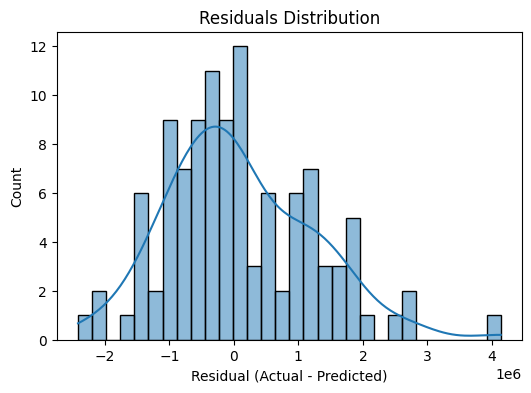

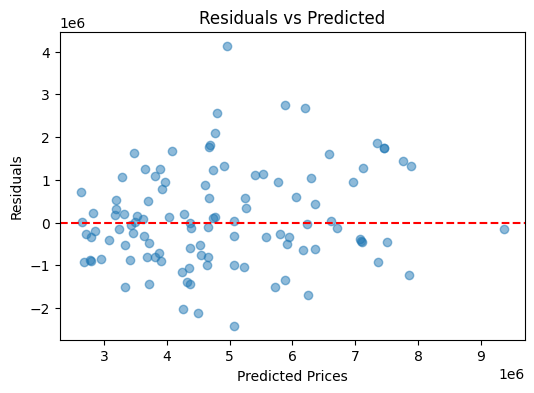

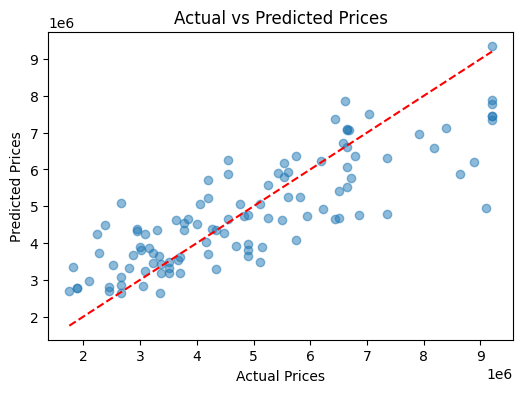

In [ ]:
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("regressor", Lasso(alpha=0.1))
])
pipeline.fit(X_train, y_train)

# ---------------- Save the winning pipeline ----------------
joblib.dump(lasso_final, "lasso_house_price_model.pkl")
print("✅ Lasso model saved as lasso_house_price_model.pkl")

# ---------------- Residual diagnostics ----------------
y_pred = lasso_final.predict(X_test)
residuals = y_test - y_pred

# 1. Histogram of residuals
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Residuals Distribution")
plt.xlabel("Residual (Actual - Predicted)")
plt.show()

# 2. Residuals vs Predicted
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted")
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.show()

# 3. Actual vs Predicted
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')  # perfect fit line
plt.title("Actual vs Predicted Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()


## Step 5: Interpretability
- Look at feature importance (.coef_ for linear models, .feature_importances_ for trees). 
- Plot actual vs predicted prices.

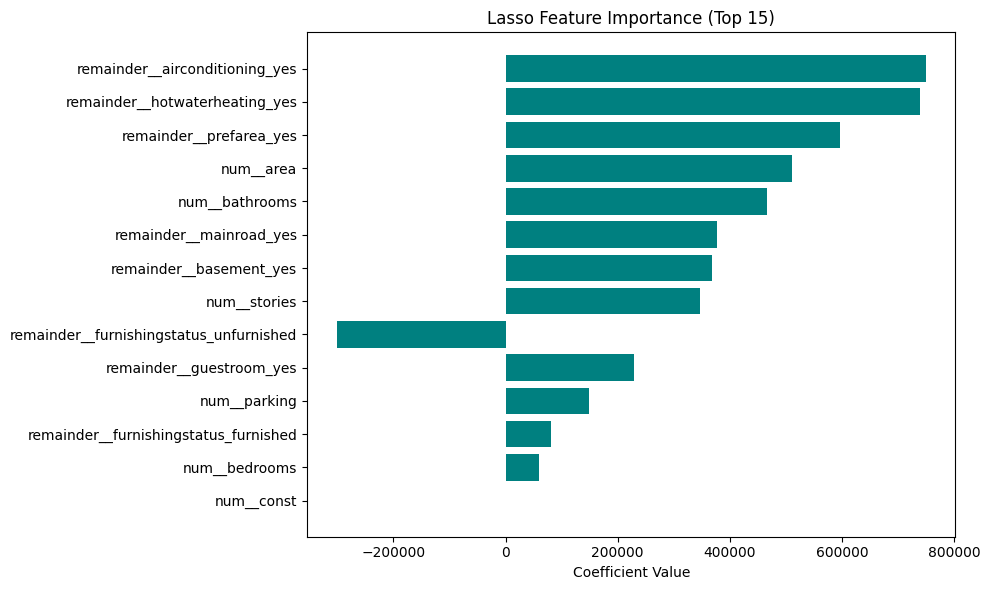

                                    Feature    Coefficient  Abs_Coefficient
10           remainder__airconditioning_yes  750047.229086    750047.229086
9            remainder__hotwaterheating_yes  738938.577067    738938.577067
11                  remainder__prefarea_yes  596790.243942    596790.243942
1                                 num__area  511688.184933    511688.184933
3                            num__bathrooms  466551.679827    466551.679827
6                   remainder__mainroad_yes  377615.296469    377615.296469
8                   remainder__basement_yes  368032.923845    368032.923845
4                              num__stories  346991.639037    346991.639037
13  remainder__furnishingstatus_unfurnished -301540.236528    301540.236528
7                  remainder__guestroom_yes  229881.029523    229881.029523
5                              num__parking  148859.555624    148859.555624
12    remainder__furnishingstatus_furnished   81858.080027     81858.080027
2           

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import joblib
import pandas as pd

# === 1. Load your saved Lasso pipeline ===
lasso_pipeline = joblib.load("lasso_house_price_model.pkl")

# === 2. Get feature names from preprocessing step ===
preprocessor = lasso_pipeline.named_steps["pre"]
feature_names = preprocessor.get_feature_names_out()

# === 3. Get coefficients from the Lasso model ===
lasso_coefs = lasso_pipeline.named_steps["model"].coef_

# === 4. Create DataFrame for easy viewing ===
coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": lasso_coefs,
    "Abs_Coefficient": np.abs(lasso_coefs)
})

# Sort by absolute value (importance)
coef_df = coef_df.sort_values("Abs_Coefficient", ascending=False)

# === 5. Plot top 15 most important features ===
top_n = 15
plt.figure(figsize=(10, 6))
plt.barh(coef_df["Feature"].head(top_n), coef_df["Coefficient"].head(top_n), color="teal")
plt.gca().invert_yaxis()  # Largest on top
plt.xlabel("Coefficient Value")
plt.title(f"Lasso Feature Importance (Top {top_n})")
plt.tight_layout()
plt.show()

# === 6. Optional: See all coefficients in a table ===
print(coef_df.head(20))


In [61]:
print(lasso_pipeline.named_steps.keys())

dict_keys(['pre', 'model'])


# Model Deployement 

## Prep
### Save the full pipeline (preprocessing + model) properly

Why?
- So you don’t just save the bare model, but also your encoders/scalers, ensuring new unseen data can be fed in directly.
- This gives you a single .pkl pipeline you can later plug into Streamlit/React without redoing preprocessing.

In [64]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso

# 1. Raw dataset
X = df.drop("price", axis=1)
y = df["price"]

X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2. Column groups
numeric_cols = X_train_raw.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = X_train_raw.select_dtypes(include=["object"]).columns.tolist()

# 3. Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_cols)
    ],
    remainder="drop",
    verbose_feature_names_out=False
)

# 4. Recreate Lasso with best alpha (from your tuning)
best_alpha = 10   # use your tuned value
lasso_final_clean = Lasso(alpha=best_alpha, random_state=42, max_iter=10000)

# 5. Build pipeline
final_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", lasso_final_clean)
])

# 6. Fit pipeline on RAW DataFrame
final_pipeline.fit(X_train_raw, y_train)

# 7. Save pipeline
joblib.dump(final_pipeline, "house_price_pipeline.pkl")
print("✅ Final pipeline saved successfully!")


✅ Final pipeline saved successfully!


### Post-save sanity check (deployment validation).
Now that we have:

✅ Best model chosen (Lasso with alpha=10)
✅ Pipeline saved (house_price_pipeline.pkl)

👉 The next logical step is a post-save sanity check (deployment validation).
That means:

- Load the saved pipeline.
- Run predictions on your test set (X_test_raw).
- Compute RMSE, MAE, R² again — make sure it matches what you got earlier.
- (Optional) Do a quick prediction with a manually entered sample house to confirm it works for new data.

⚡ This confirms our house_price_pipeline.pkl is deployable and gives consistent performance.

In [65]:
import joblib
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# 1. Load pipeline
loaded_pipeline = joblib.load("house_price_pipeline.pkl")

# 2. Predict on test set (raw DataFrame)
y_pred = loaded_pipeline.predict(X_test_raw)

# 3. Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("=== Sanity Check: Loaded Pipeline Performance ===")
print(f"RMSE: {rmse:,.4f}")
print(f"MAE : {mae:,.4f}")
print(f"R²  : {r2:.4f}")

# 4. (Optional) Single prediction with new data
sample = X_test_raw.iloc[[0]]  # first row as a sample
pred_price = loaded_pipeline.predict(sample)
print("\nSample input:\n", sample)
print("Predicted Price:", pred_price[0])


=== Sanity Check: Loaded Pipeline Performance ===
RMSE: 1,136,714.7050
MAE : 881,944.3105
R²  : 0.6802

Sample input:
        area  bedrooms  bathrooms  stories mainroad guestroom basement  \
316  5900.0         4          2        2       no        no      yes   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
316              no              no        1       no      unfurnished  
Predicted Price: 5063595.626727007
